In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10348571942402530975
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4615812921358632749
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [4]:
!cat /proc/meminfo

MemTotal:       13302920 kB
MemFree:         9294504 kB
MemAvailable:   11799116 kB
Buffers:          114232 kB
Cached:          2407912 kB
SwapCached:            0 kB
Active:          1563828 kB
Inactive:        2131520 kB
Active(anon):     990852 kB
Inactive(anon):     2516 kB
Active(file):     572976 kB
Inactive(file):  2129004 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               220 kB
Writeback:             0 kB
AnonPages:       1173188 kB
Mapped:           664380 kB
Shmem:              3252 kB
KReclaimable:      88212 kB
Slab:             142584 kB
SReclaimable:      88212 kB
SUnreclaim:        54372 kB
KernelStack:        5072 kB
PageTables:        14248 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3737216 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       46764 kB
VmallocChunk:          0 kB
Percpu:          

In [6]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [7]:
!pip install -q keras

In [8]:
import pandas as pd

In [9]:
#Importing the dataset 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
df

,T2M,T2M_MAX,T2M_MIN,PRECTOTCORR,RH2M,WS50M,WS50M_MAX,WS50M_MIN,PM2.5
0,28.29,34.65,23.40,5.95,67.94,5.19,7.70,2.67,34.49
1,29.12,36.17,23.28,2.08,66.56,5.68,7.59,3.39,27.89
2,29.19,36.48,23.39,7.67,67.56,5.38,7.50,3.14,21.64
3,29.26,36.38,23.40,5.68,66.50,5.20,7.64,3.12,23.07
4,30.48,38.27,24.51,2.63,63.50,5.32,7.64,3.66,21.27
...,...,...,...,...,...,...,...,...,...
1390,30.02,37.79,24.98,0.05,65.62,6.88,8.09,4.95,23.73
1391,30.11,38.51,23.83,0.20,65.12,6.16,7.30,5.41,26.85
1392,30.38,38.89,24.24,0.12,64.62,6.84,8.64,5.44,19.72
1393,30.98,39.46,25.00,0.32,64.88,6.47,8.62,3.92,11.15


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

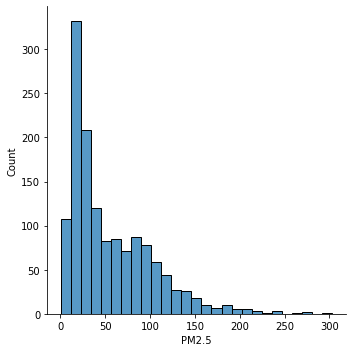

In [13]:
sns.displot(y)

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [17]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
66/66 [=============================

### Model Evaluation

In [18]:
prediction=NN_model.predict(X_test)

In [19]:
y_test

152      41.91
198      54.26
1182     30.56
426      38.73
142      99.69
         ...  
1259     71.98
349      44.70
930     120.44
371      24.24
831      12.04
Name: PM2.5, Length: 419, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


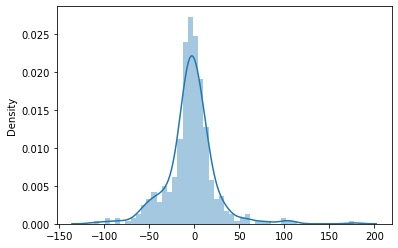

In [20]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

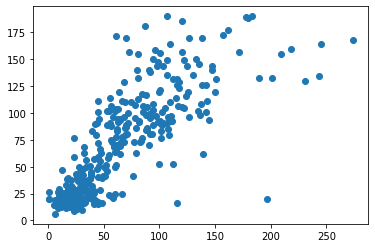

In [21]:
plt.scatter(y_test,prediction)

In [23]:
import numpy as np
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 18.11388440088896
MSE: 780.3383420709044
RMSE: 27.93453672554647
